# Boston Housing Prices: Linear Regression

In [136]:
import os

#data manipulation libraries
import pandas as pd
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Get the current working directory/folder

In [137]:
os.getcwd() #current working directory

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\09. Data Science IITR - 10Feb2024'

In [138]:
os.listdir()

['.ipynb_checkpoints',
 'Boston_Housing_Dataset.csv',
 'Intro to ML.pdf',
 'Intro to ML_ Linear Regression.pdf',
 'Intro_to_Linear_Regression_11Feb_APC.pdf',
 'Intro_to_Linear_Regression_17Feb_APC.pdf',
 'Intro_to_Linear_Regression_18Feb_APC.pdf',
 'LinearRegression_Sample_Model.xlsx',
 'ml',
 'ML01-Linear_Regression_24Feb_APC.ipynb',
 'sss']

## Step 1 : Loading the dataset

`pd.read_csv()`

In [3]:
df_boston = pd.read_csv('Boston_Housing_Dataset.csv')

In [4]:
df_boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df_boston.sample(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
360,360,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,25.0
258,258,0.66351,20.0,3.97,0.0,0.647,7.333,100.0,1.8946,5.0,264.0,13.0,383.29,7.79,36.0
206,206,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97,24.4
195,195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
373,373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8


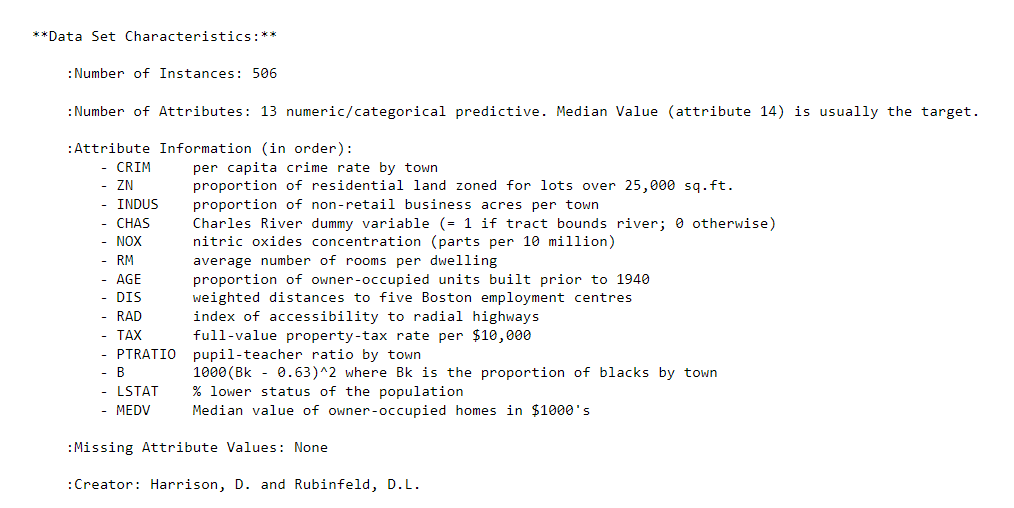

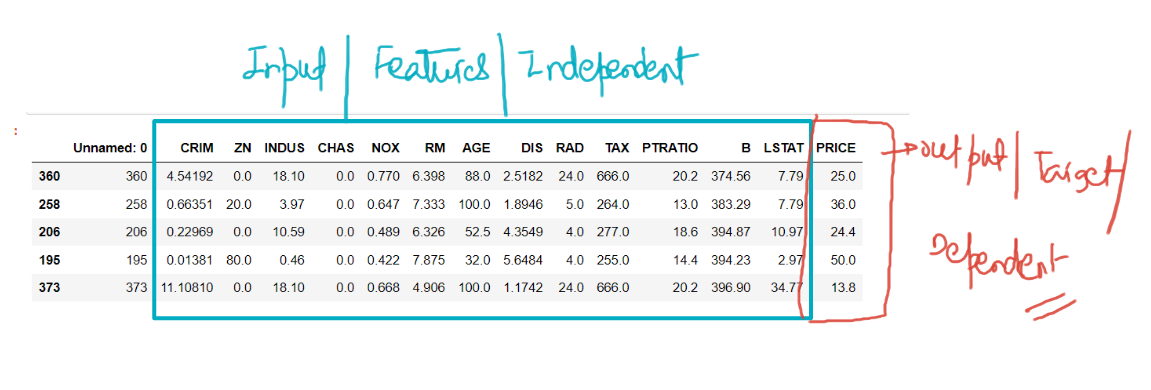

### Drop the column `unmamed:0`

In [15]:
os.listdir()

['.ipynb_checkpoints',
 'Boston_Housing_Dataset.csv',
 'Intro to ML.pdf',
 'Intro to ML_ Linear Regression.pdf',
 'Intro_to_Linear_Regression_11Feb_APC.pdf',
 'Intro_to_Linear_Regression_17Feb_APC.pdf',
 'Intro_to_Linear_Regression_18Feb_APC.pdf',
 'LinearRegression_Sample_Model.xlsx',
 'ML01-Linear_Regression_24Feb_APC.ipynb']

In [7]:
df_boston.columns #to get the column names 

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [8]:
df_boston.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Step #2 Exploratory Data Analysis

In [10]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- Data has no missing records

### Check for any missing values

`pd.isna()`

In [13]:
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

`There are no missing values in any of the variables`

### Can you  try plotting histogram to understand the distribution of `median price`

In [17]:
plt.style.use('fivethirtyeight') #theme for look and feel of the chart

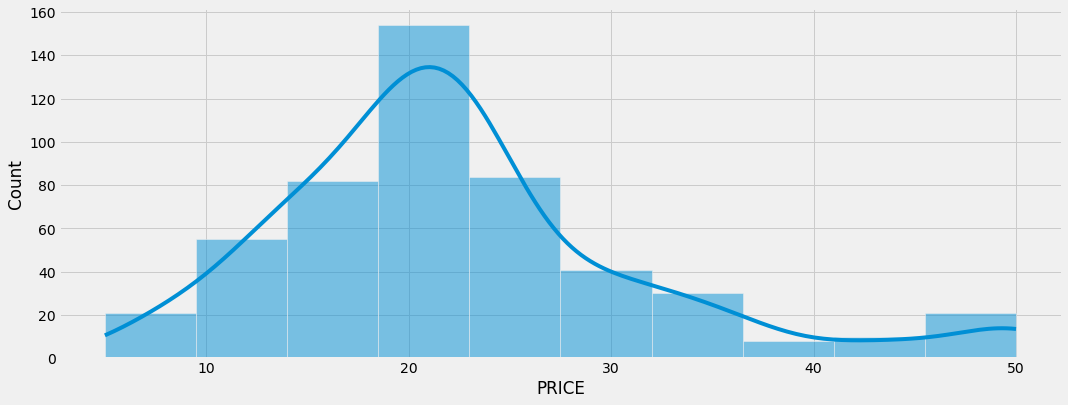

In [23]:
plt.subplots(figsize=(16,6))
sns.histplot(df_boston['PRICE'], bins=10, kde=True) #kde stands for Kernel density
plt.show()

- On an average median price moves around 22K USD
- Distribuution is slightly right skewed and there are close to ~20-30 houses in the price range of 40-50K USD

### Let us filter all the houses with price more than `45K USD`

In [24]:
select_house_more_than_45KUSD = df_boston['PRICE']>45

In [30]:
df_boston[select_house_more_than_45KUSD]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7


In [31]:
df_boston[select_house_more_than_45KUSD]['RM'].mean()

7.608772727272726

- Key takeaway here is that number of rooms per house seems to be key driving factor for house prices

## Step#3 Key Inputs Selection / Feature Selection

## Correlation Coefficient

The correlation coefficient is a statistical measure that describes the strength and direction of the relationship between two variables. It ranges from -1 to 1, where:


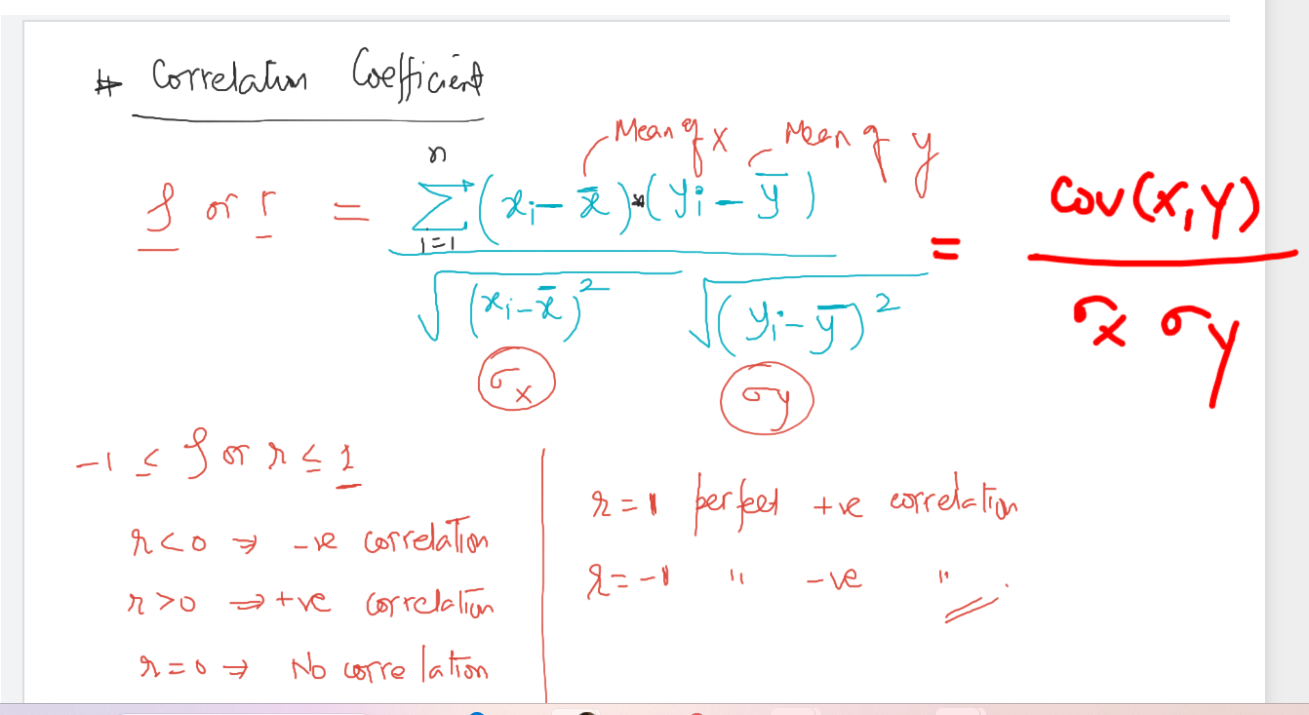

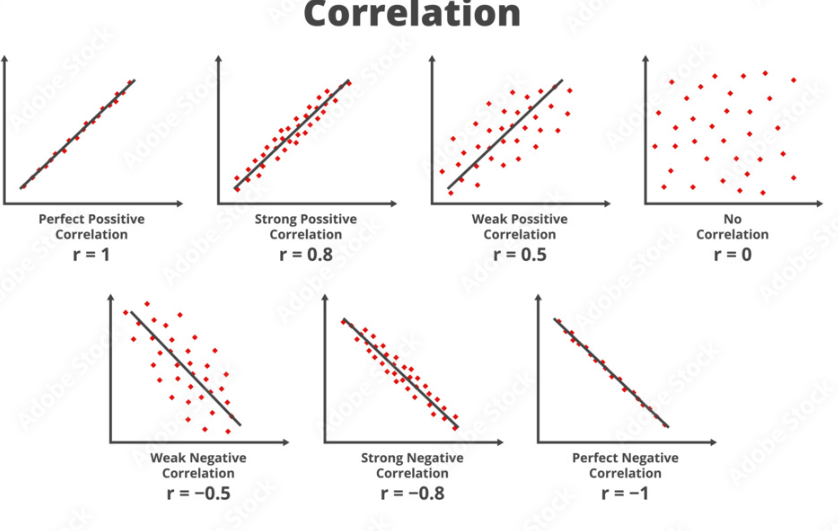

## Correlation Plot

### `helps to do the feature selection`

#### `let us plot the correlation heat map`

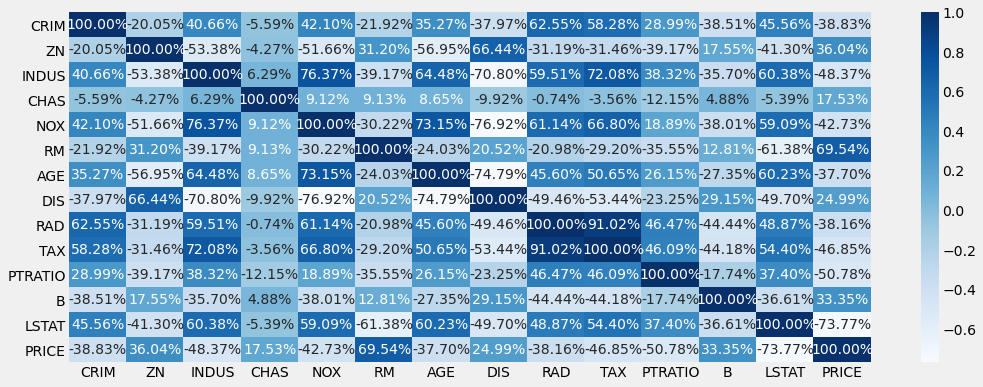

In [36]:
plt.figure(figsize=(16,6))
sns.heatmap(df_boston.corr(), cmap = 'Blues', annot=True, fmt='.2%')
plt.show()

## Simple Linear Regression Model

#### `one x and one y`

`x: RM`
`Y:PRICE`

# Step: 4 Building Machine Learning Model

## Splitting data as training, validation and testing data sets
- `In later session, I am going to delve into details of it`

In [37]:
X = df_boston['RM']

In [38]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [39]:
type(X)

pandas.core.series.Series

#### ML model needs data to be in array format for one dimension - only one X

`np.array()`

In [40]:
X = np.array(X).reshape(-1,1) #transform the pandas series to the required format - Scikitlearn

In [41]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [43]:
X.ndim # 2D array

2

In [48]:
y=df_boston['PRICE']

In [49]:
y = np.array(y).reshape(-1,1)

In [50]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [51]:
y.ndim

2

### Split the `X` and `y`using 80% for training and 20% for testing - leveraging Scikitlearn

### import libraries from sklearn

In [148]:
from sklearn.linear_model import LinearRegression #select the model
from sklearn.model_selection import train_test_split, cross_val_score #training & validation sets
from sklearn.metrics import mean_squared_error, r2_score  #performance of the model

In [53]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X,y, test_size=0.20, random_state=5) 

`random state keeps the memory of random data and helps you to reproduce the same sample again & again`

- `random_state` parameter sets the random seed to ensure the reproductibility of the split
- By using this, we will see the same split each time code is run

In [73]:
X_train_1.mean()

6.288455445544555

In [55]:
X_train_1.shape

(404, 1)

In [56]:
X_val_1.shape

(102, 1)

In [57]:
404 + 102

506

In [78]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X,y, test_size=0.20,random_state=5)  #without locking

In [79]:
X_train_2.mean() #earlier run

6.288455445544555

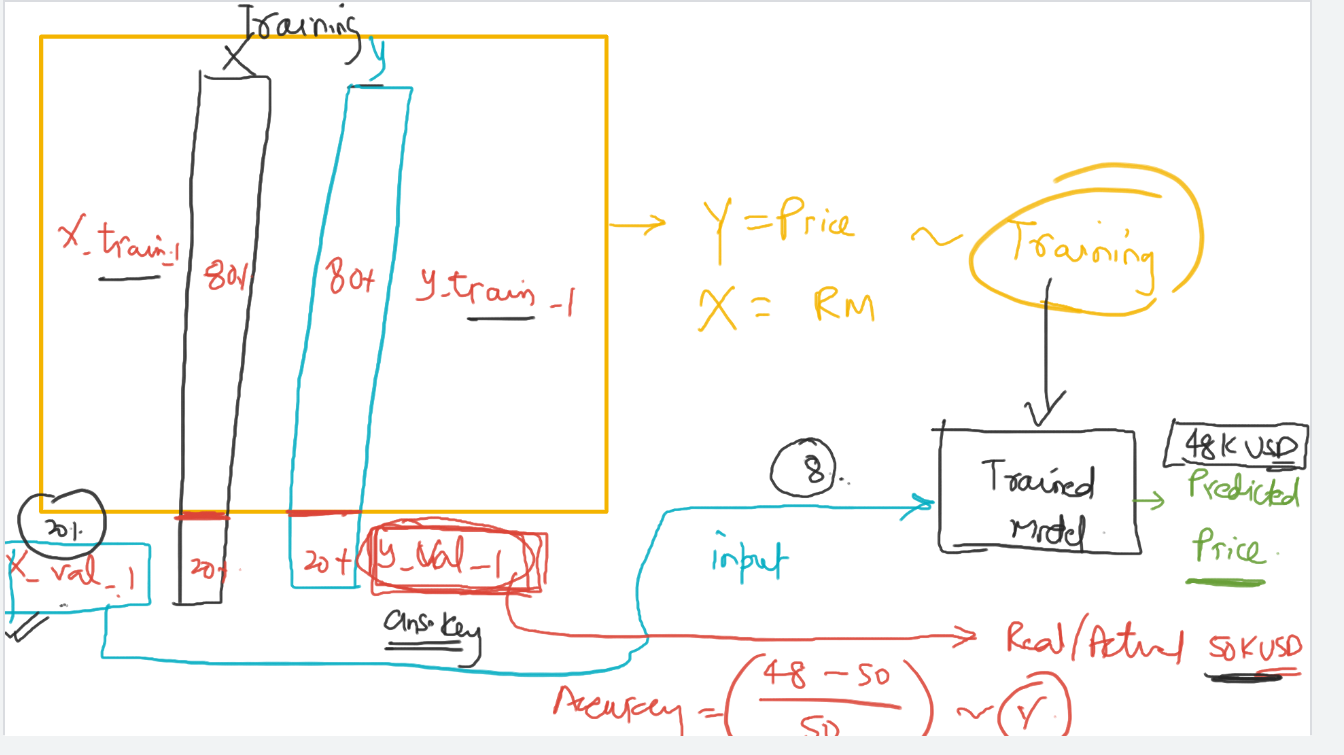

## Training the model

In [81]:
slrm_1 = LinearRegression() #calling the linear regression model and creating model object

In [86]:
slrm_1 #LinearRegression Object

LinearRegression()

`training is as good as fitting the model`

In [87]:
slrm_1.fit(X_train_1, y_train_1) #80% split for RM and Price to train the model

LinearRegression()

### Validating the model

#### X_val_1 - input for testing the model - # RM in a house

In [88]:
y_predicted_1 = slrm_1.predict(X_val_1) 

In [93]:
y_predicted_1.shape

(102, 1)

In [110]:
y_predicted_1

array([[38.10145909],
       [25.66038564],
       [23.78098944],
       [10.44874691],
       [35.02207282],
       [13.96048253],
       [28.71330154],
       [26.50743745],
       [26.41037943],
       [23.95745857],
       [32.59562233],
       [19.9692563 ],
       [19.85455137],
       [31.00740019],
       [24.84862766],
       [19.2016156 ],
       [ 7.99582605],
       [14.84282817],
       [14.71929978],
       [17.95750826],
       [12.09873325],
       [23.38393391],
       [40.09556022],
       [23.47216847],
       [29.70152865],
       [18.81338352],
       [23.41922773],
       [21.65453646],
       [22.88982035],
       [25.21038937],
       [18.83103043],
       [14.93106273],
       [19.10455758],
       [32.39268283],
       [24.46921904],
       [22.97805492],
       [25.6692091 ],
       [19.18396869],
       [41.26025646],
       [29.13682744],
       [21.80453522],
       [11.44579748],
       [25.55450417],
       [19.8898452 ],
       [24.94568568],
       [27

In [113]:
(38.10145909 - 37.6)* (38.10145909 - 37.6)

0.25146121894362544

In [111]:
y_val_1

array([[37.6],
       [27.9],
       [22.6],
       [13.8],
       [35.2],
       [10.4],
       [23.9],
       [29. ],
       [22.8],
       [23.2],
       [33.2],
       [19. ],
       [20.3],
       [36.1],
       [24.4],
       [17.2],
       [17.9],
       [19.6],
       [19.7],
       [15. ],
       [ 8.1],
       [23. ],
       [44.8],
       [23.1],
       [32.2],
       [10.8],
       [23.1],
       [21.2],
       [22.2],
       [24.1],
       [17.3],
       [ 7. ],
       [12.7],
       [17.8],
       [26.4],
       [19.6],
       [25.1],
       [ 8.3],
       [48.8],
       [34.9],
       [13.8],
       [14.4],
       [30.1],
       [12.7],
       [27.1],
       [24.8],
       [ 7. ],
       [20.5],
       [21.5],
       [14. ],
       [20.4],
       [22.2],
       [21.4],
       [13.5],
       [19.4],
       [24.7],
       [43.8],
       [14.1],
       [28.6],
       [19.7],
       [16.8],
       [23.2],
       [16.2],
       [41.3],
       [22.7],
       [ 8.3],
       [18

### Measure the model performance 

### Root Mean Squared Error

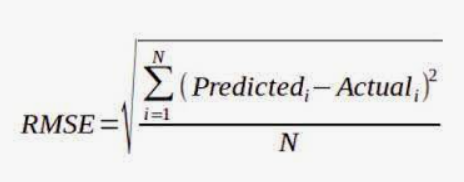

In [94]:
mean_squared_error = mean_squared_error(y_predicted_1, y_val_1)

In [95]:
mean_squared_error

23.97045552799131

In [96]:
rmse = np.sqrt(mean_squared_error)

In [97]:
rmse

4.895963186952217

In [98]:
y.min()

5.0

In [99]:
y.max()

50.0

In [100]:
y.mean() #average price

22.532806324110677

In [104]:
error = rmse/y.mean()*100
print("Error:", error)
print("Accuracy:", 100-error)

Error: 21.728155457109715
Accuracy: 78.27184454289028


### R-Square



In [107]:
r_squared = slrm_1.score(X_val_1, y_val_1)

In [109]:
r_squared*100

69.38399401553497

## Task #1: Build simple linear regression model for each of the inputs taking one at a time

## Task #2: Try to calculate the RMSE using excel - y_predicted_1 and y_val_1

``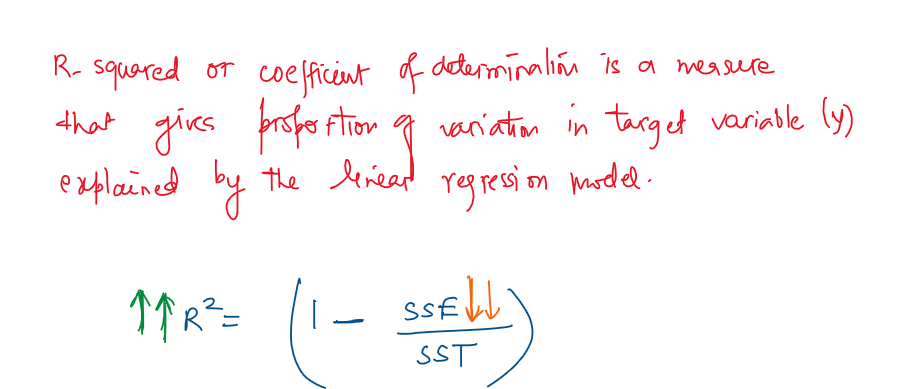

In [116]:
df_boston['RM'].mean()

6.284634387351787

### Task #3 Analyze if you can find 7 or more rooms in a house in higher LSTAT zone @Francis

`### Input Vars: RM, LSTAT and model Multiple Linear Regression Model`

In [117]:
X = df_boston[['RM', 'LSTAT']] #selected two input variables

In [118]:
X

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [139]:
y = df_boston['PRICE']

In [121]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

### Splitting data as training & validation sets

In [122]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X,y, test_size=0.20, random_state=5) 

In [123]:
X_train_2.mean()

RM        6.288455
LSTAT    12.478045
dtype: float64

### Training the model

In [125]:
mlrm_1 = LinearRegression() #created the model object

In [126]:
mlrm_1.fit(X_train_2, y_train_2)

LinearRegression()

In [128]:
print(X_train_1.mean())
print(X_train_2.mean())

6.288455445544555
RM        6.288455
LSTAT    12.478045
dtype: float64


In [129]:
print(y_train_1.mean())
print(y_train_2.mean())

22.64678217821782
22.646782178217833


### Predict the validation set

In [130]:
y_predicted_2 = mlrm_1.predict(X_val_2) #predict price for the validation set

In [134]:
y_predicted_2

array([37.38999403, 29.79290611, 25.86755297,  0.31370828, 33.31385559,
        7.97136102, 30.7066387 , 27.83076842, 26.26693081, 21.97871678,
       32.33149332, 23.21791374, 22.9932889 , 30.97465356, 27.19747687,
       20.7171544 , -0.67524986, 18.01248654, 12.3108109 , 21.90615827,
        4.82262227, 24.00423026, 37.70279396, 24.59521859, 29.6355729 ,
       12.5396288 , 27.07081337, 22.44485896, 27.64895322, 28.99223597,
       11.38689571, 10.39119661, 18.02726641, 24.65916571, 26.3259374 ,
       22.97547671, 26.32610451, 12.30204538, 37.03909693, 33.55198947,
       20.2779501 ,  1.0905118 , 27.65786778, 16.52789139, 27.49181818,
       29.91634422, -3.04746229, 17.23365847, 20.71953914, 13.74285813,
       20.74965837, 21.48012369, 25.17310326, 16.12470269, 17.61200383,
       27.89189158, 36.0647476 , 19.67862758, 28.88714637, 20.4560256 ,
       20.11858445, 23.1131674 , 16.53445226, 31.30827991, 22.62162748,
       13.10525045, 23.36377939, 25.90474345, 23.00735629, 21.62

### Calculate the performance metrics

`RMSE`

In [151]:
mean_squared_error2 = mean_squared_error(y_predicted_2, y_val_2)

In [153]:
rmse2 = np.sqrt(mean_squared_error2)

In [154]:
rmse2

5.137400784702911

In [163]:
rmse2/(y_val_2.mean())

0.23265767439492827

In [165]:
(1-rmse2/(y.mean()))*100

77.2003508537427

`R-Squared`

In [167]:
r2 = mlrm_1.score(X_val_2, y_val_2)

In [168]:
print("R-squared is:", r2*100)

R-squared is: 66.28996975186952


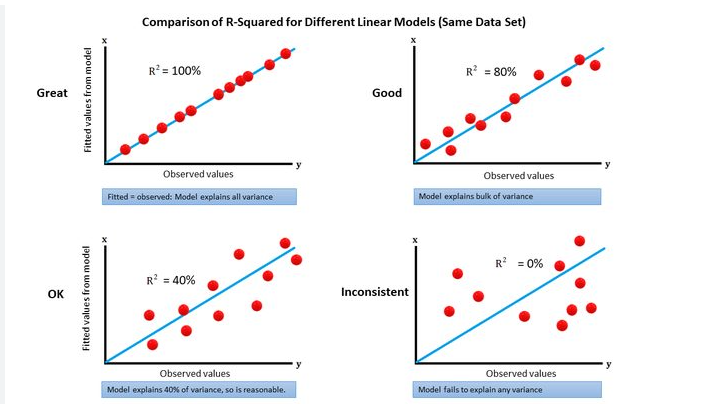

-- **R^2** measures the proportion of variance in the price which is predictable / explained from/by RM variable. Higher R^2 means better fit of the model however it doesn't convey information about the magnitude of the errors

-- **RMSE** provides a measure of the `average magnitude of the errors` made by the model in absolute sense


### Task #4 Build another model with `RM` and `TAX`

### Task #5 Build another model with `RM`, `LSTAT, TAX`, `INDUS`, `PTRATIO`

### ADJUSTED R-Squared

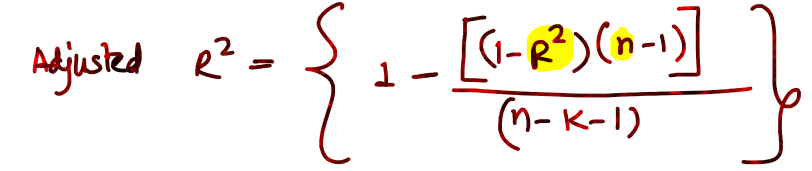

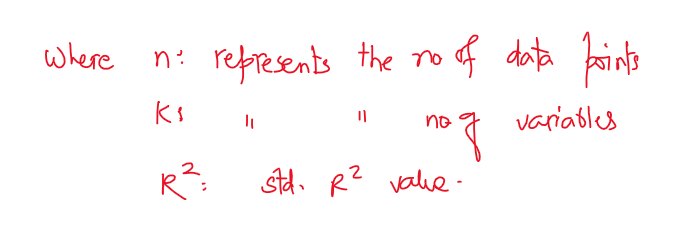

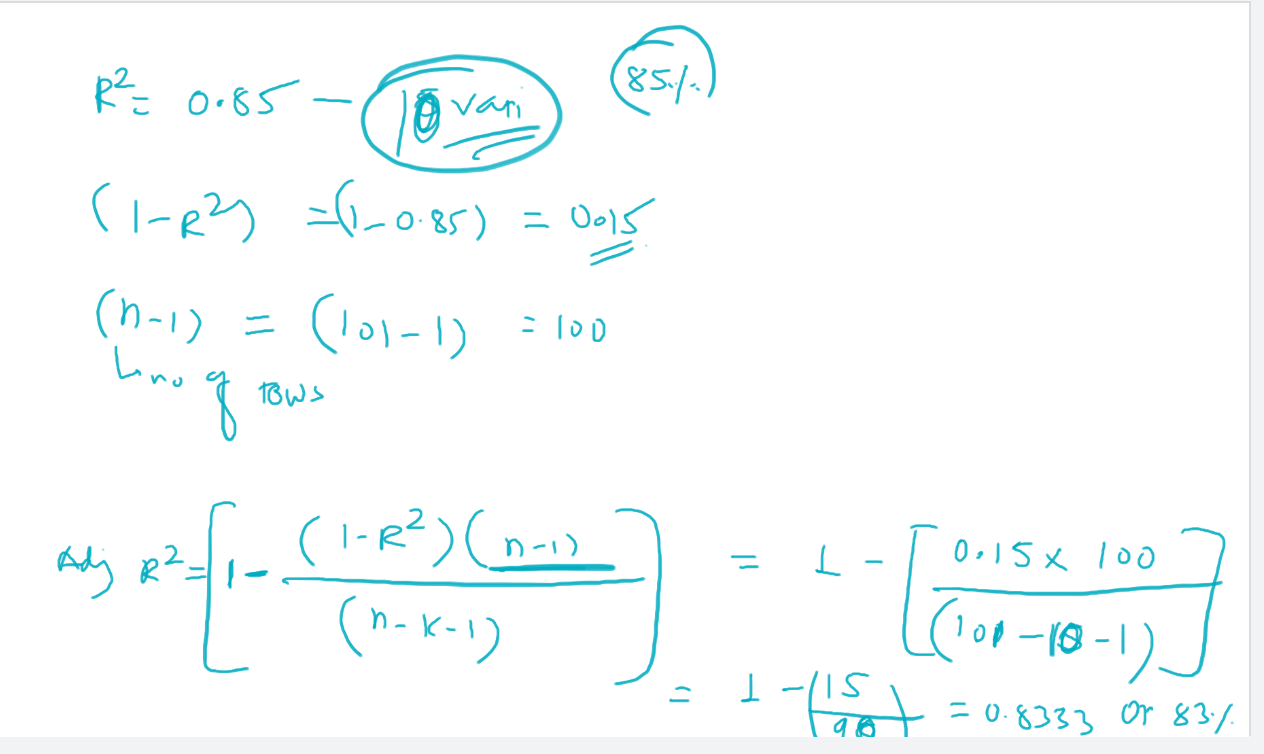

### For more than one variable, use `adjusted r-squared formula

### Multicollinearity and VIF 

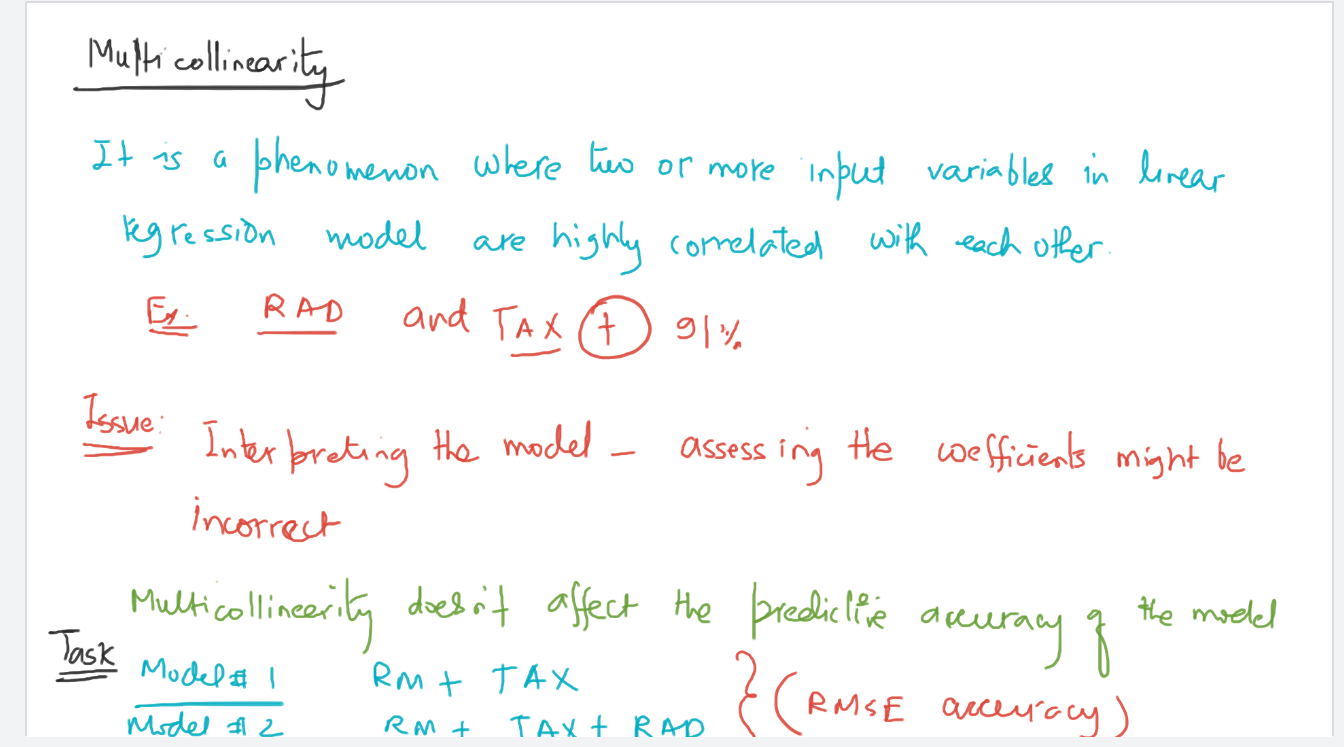

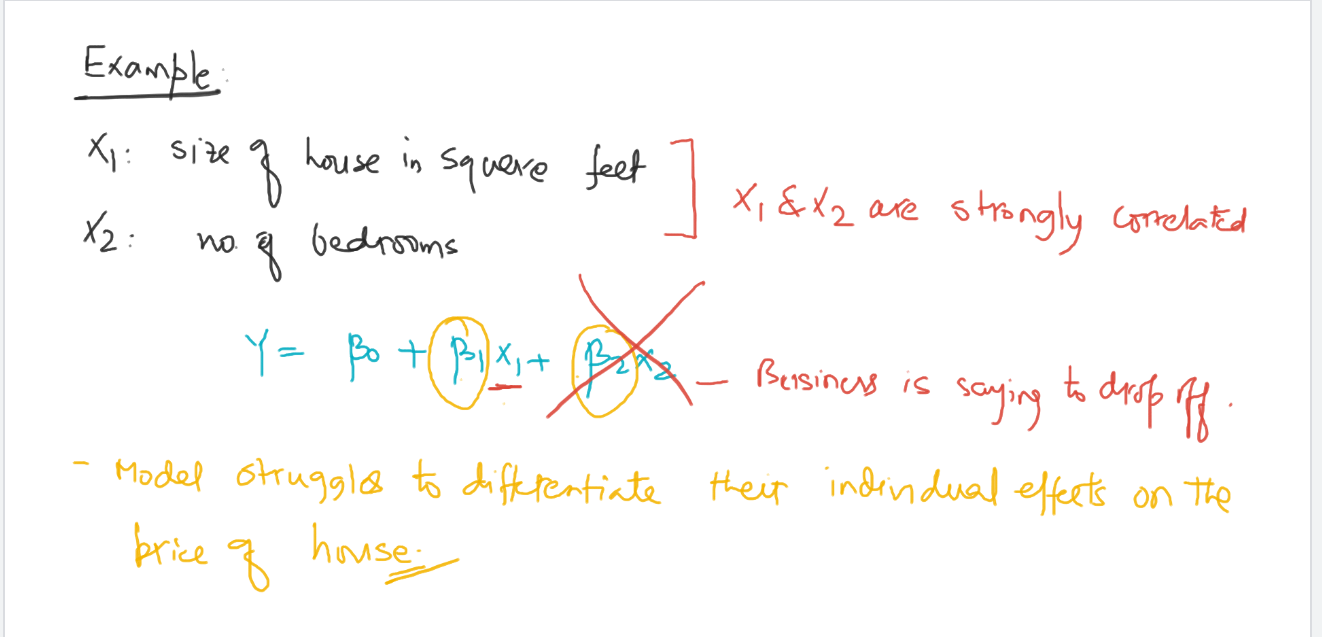

### Task #8 CORRELATION vs CAUSALITY

- VIF stands for variance inflation factor which helps you to detect multicollinearity

In [ ]:
Task 6: Variables are 'RM' & 'TAX'.
MSE is: 19.57997344484023
RMSE is: 4.424926377335586
Error is: 19.637706523047697
Accuracy is: 80.3622934769523
R Square is: 74.99168993835433


In [ ]:
Task 7: Variables are 'RM', 'TAX' & 'RAD'.
MSE is: 19.459553855697308
RMSE is: 4.411298431946915
Error is: 19.577226060948803
Accuracy is: 80.4227739390512
R Square is: 75.1454945607797
